# Pengantar Class dan Object Oriented Programming (OOP)
ikuzo 5 Oktober 2020

In [33]:
class Manusia: # Template kasarannya
    def __init__(self, warna_rambut, tinggi, berat): # Tempat inisialisasi, kalau mau masukin default value masukin di parameter nya
        self.warna_rambut = warna_rambut
        self.tinggi = tinggi
        self.berat = berat
        
    def cat_rambutnya(self, warna):
        self.warna_rambut = warna # warna_rambut di override dengan variable baru
        print(f"Warna rambutnya jadi {warna}")
        
    def BMI(self):
        return self.berat / self.tinggi ** 2 # Karena sudah ada attribute nya jadi tinggal panggil saja

In [34]:
roboco = Manusia("Coklat", 160, 50)

In [35]:
roboco.warna_rambut

'Coklat'

In [36]:
roboco.tinggi

160

In [37]:
roboco.berat

50

In [38]:
roboco.cat_rambutnya('Hitam')

Warna rambutnya jadi Hitam


In [39]:
roboco.warna_rambut

'Hitam'

In [40]:
roboco.BMI()

0.001953125

# Inheritance
Manfaatkan class orang lain

In [41]:
class Mahasiswa(Manusia):
    def __init__(self, warna_rambut, tinggi, berat, universitas):
        super().__init__(warna_rambut, tinggi, berat) # Pakai super() kalau mau access parent class nya
        self.universitas = universitas # Fitur asli dari class Mahasiswa
        
    def pindah_univ(self, universitas_baru):
        self.universitas = universitas_baru

In [42]:
shandy = Mahasiswa('hitam', 178, 84, "UMM")

In [43]:
shandy.universitas

'UMM'

In [44]:
shandy.pindah_univ("MIT")

In [45]:
shandy.universitas

'MIT'

# Coba bikin Class untuk Load Gambar 

In [46]:
from PIL import Image

class Gambar:
    def __init__(self):
        pass
    
    def open_gambar(self):
        self.gambar = Image.open('roboco.jpg')
        return self.gambar

In [47]:
illu = Gambar()

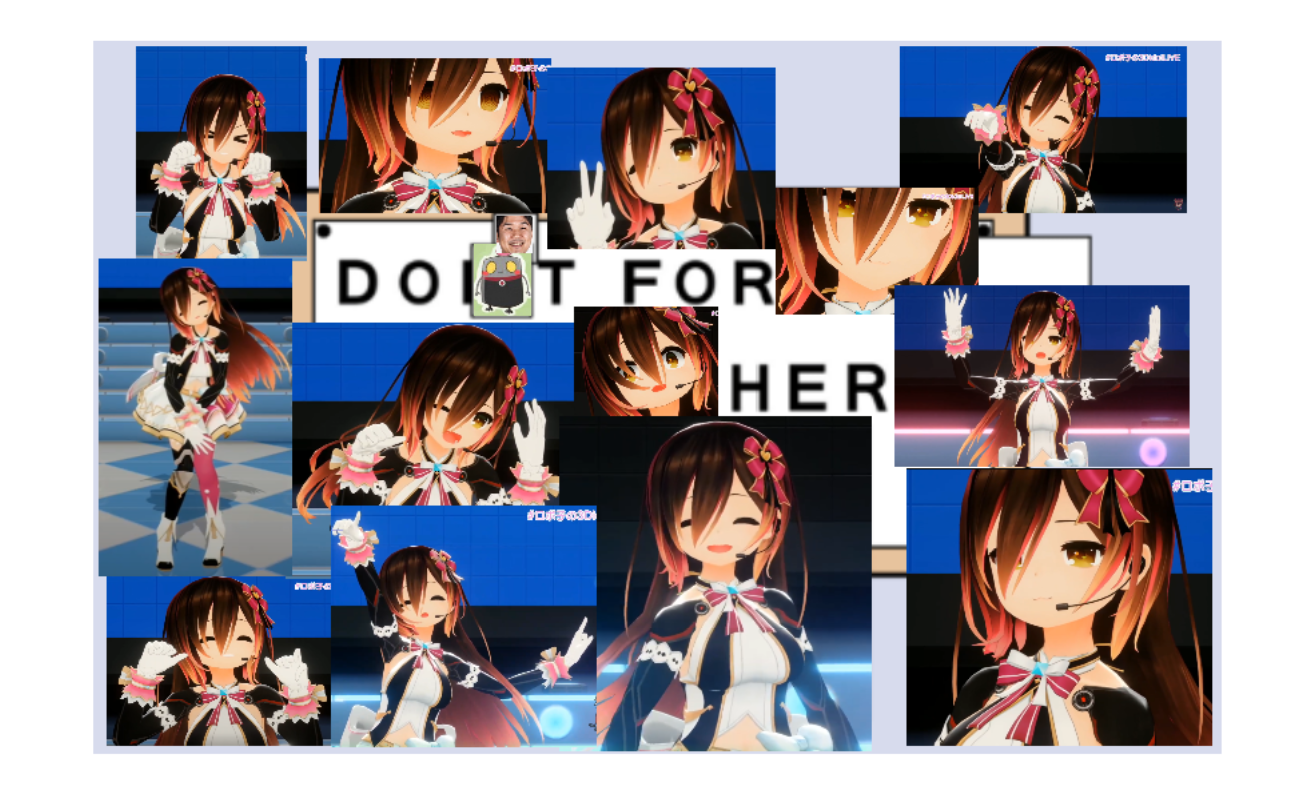

In [48]:
illu.open_gambar()

# PyTorch NN Module 

In [49]:
import torch
from torch import nn

In [50]:
??nn.Module

In [50]:
class CustomNeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        # fc adalah fully connected atau di Keras/Tensorflow biasanya Dense
        self.fc = nn.Sequential( 
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, output_size),
            nn.Sigmoid()
        )
        
    # Feedforward adalah codingan yang wajib kalau build neural network class
    
    def forward(self, x): 
        return self.fc(x)

# Advanced PyTorch contoh (Jangan di run nanti error)

Studi kasus nya multi task learning, jadi input size -> 16 -> 1.) 4 output buat regresi
                                                           -> 2.) 1 output buat classifier

In [29]:
class FaceBiometric(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Sequential( 
            nn.Linear(input_size, 16),
            nn.ReLU()
        )
        
        self.reg = nn.Linear(16, 4)
        self.clf = nn.Sequential(
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.fc(x)
        pred_reg = self.reg(x)
        pred_clf = self.clf(x)
        return pred_reg, pred_clf

In [51]:
model = CustomNeuralNetwork(7, 1)

In [52]:
contoh_data = torch.rand(100, 7)
contoh_data

tensor([[0.6619, 0.9414, 0.6114, 0.3271, 0.8898, 0.4459, 0.7968],
        [0.1547, 0.6384, 0.8639, 0.5325, 0.4277, 0.3566, 0.5608],
        [0.2610, 0.9867, 0.0304, 0.9061, 0.9912, 0.4116, 0.5629],
        [0.1633, 0.1736, 0.9900, 0.5974, 0.0310, 0.9490, 0.7669],
        [0.1372, 0.4423, 0.2788, 0.7627, 0.1968, 0.4743, 0.9086],
        [0.2703, 0.7469, 0.3324, 0.7629, 0.2695, 0.7591, 0.1457],
        [0.1013, 0.6977, 0.4847, 0.3437, 0.6382, 0.3944, 0.7922],
        [0.3497, 0.2151, 0.1223, 0.2424, 0.3470, 0.2289, 0.6526],
        [0.8860, 0.0278, 0.1036, 0.0906, 0.3315, 0.0011, 0.4339],
        [0.3676, 0.3329, 0.8454, 0.7385, 0.7507, 0.6873, 0.4192],
        [0.3439, 0.1097, 0.7302, 0.1825, 0.0540, 0.5427, 0.6906],
        [0.9827, 0.3190, 0.7909, 0.9409, 0.4022, 0.0586, 0.4886],
        [0.7387, 0.9460, 0.7290, 0.7962, 0.3341, 0.8490, 0.5562],
        [0.3897, 0.4014, 0.0570, 0.4612, 0.7695, 0.3178, 0.8589],
        [0.3581, 0.4746, 0.3660, 0.6148, 0.8479, 0.7049, 0.9254],
        [0

In [55]:
# model.forward(contoh_data) # Cara 1

# langsung model(data), soalnya sudah tau kalau yang dimaksud adalah mau melakukan feedforward
output = model(contoh_data) 

In [56]:
output

tensor([[0.4017],
        [0.3860],
        [0.3984],
        [0.3705],
        [0.3875],
        [0.3808],
        [0.3940],
        [0.3956],
        [0.4033],
        [0.3797],
        [0.3843],
        [0.3872],
        [0.3825],
        [0.4006],
        [0.3888],
        [0.4072],
        [0.4027],
        [0.3916],
        [0.3908],
        [0.3718],
        [0.3819],
        [0.4004],
        [0.3938],
        [0.3866],
        [0.4028],
        [0.3963],
        [0.3937],
        [0.3943],
        [0.3794],
        [0.4011],
        [0.3901],
        [0.3869],
        [0.3934],
        [0.4000],
        [0.3894],
        [0.3908],
        [0.3932],
        [0.3885],
        [0.4006],
        [0.3999],
        [0.3932],
        [0.3775],
        [0.3968],
        [0.3916],
        [0.3800],
        [0.3881],
        [0.3822],
        [0.3871],
        [0.3879],
        [0.3904],
        [0.3901],
        [0.3886],
        [0.3950],
        [0.4064],
        [0.3792],
        [0